In [1]:
import omega500analysistools.IO.load_db as load_db
from omega500fitstools.IO.read_Omega500 import *
from scipy.stats.stats import pearsonr   
from scipy.stats import spearmanr
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pylab
from scipy import stats

In [2]:
import pandas as pd
import numpy as np
import sqlite3

import matplotlib.pyplot as plt
plt.style.use('mypresentation')

from mergertree, get z0_parent_id, child_id, child_aexp, is_main_line 

from halos, according to the selection from mergertree (match aexp,id), get M_total_500c 

add another sheet super mergertree, with columns z0_parent_id, parent_aexp/id, child_aexp/id, parent/child M_total_500c

and plot aexp vs. M_total_500c

In [3]:
#reload(load_data)

#### Calculate Gamma over a specific time range

In [4]:
from load_data import *
a=0.7
acutgamma=a
Gamma=calc_Gamma(acutgamma)

smt contain info about all z=0 CLs' mass at different epoch
 merger (calc by r200m) contain T/F info about whether CL experienced merger after a=?
groupbyz0id.get_group(CLno) gives all info for CLno mass(z)
allelldata, 85*15, 85 CLs, [0] is CL id, following 3D gas ell at rlist r500c
e.g. allelldata[:,0] gives all CLids, in increasing number order
 allelldata[?,4] gives CL? ell at rlist[4]=0.3 r500c
default definition is M_total_200m


In [5]:
ir=8
print rlist[ir]
ell_r500c=allelldata[:,ir]

0.7


In [5]:
gascenter_Lv7elldata=np.loadtxt('../data/Lv7_r500c_ell_NR_gas_gascenter.txt')
gascenter_Lv8elldata=np.loadtxt('../data/Lv8_r500c_ell_NR_gas_gascenter.txt')
rlist=[0,0.15,0.2,0.25,0.3,0.4,0.5,0.6]
# allelldata, 85*15, 85 CLs, [0] is CL id, following 3D gas ell at rlist r500c
# e.g. allelldata[:,0] gives all CLids, in increasing number order
#      allelldata[?,4] gives CL? ell at 0.3 r500c
allelldata=np.concatenate((gascenter_Lv8elldata,gascenter_Lv7elldata[:,1:]),axis=1)
allz0id=allelldata[:,0]
print np.shape(allelldata)

(85, 8)


In [6]:
print allelldata[50,:]

[ 81.        0.41131   0.67084   0.63417   0.65035   0.74256   0.75151
   0.79989]


default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m


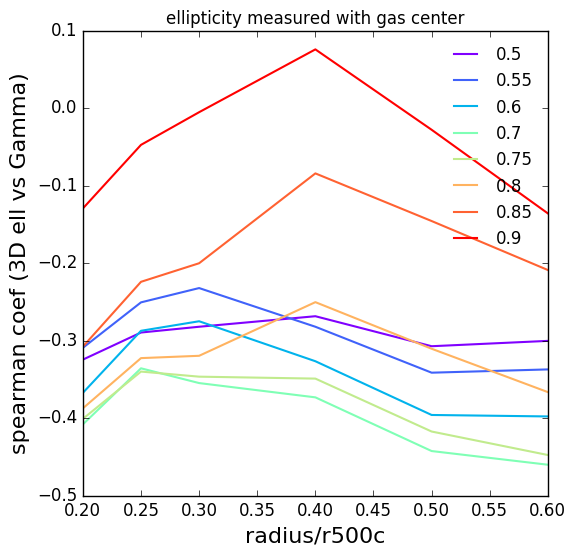

In [8]:
plt.figure(figsize=(6,6))
cnorm_gamma=colors.Normalize(vmin=0.5,vmax=0.9)
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)

for spco_acutgamma in [0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9]:
    spco_Gamma=calc_Gamma(spco_acutgamma)
    spco=[]
    r_spco=[]
    rindex=[2,3,4,5,6,7]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    plt.plot(r_spco,spco,label=str(spco_acutgamma),c=color)
    plt.legend()
plt.title('ellipticity measured with gas center')
plt.xlabel('radius/r500c')
plt.ylabel('spearman coef (3D ell vs Gamma)')
plt.savefig('spearman_coef_gascenter.png')
plt.savefig('spearman_coef_gas_center.eps')

plt.show()

In [14]:
print spearmanr(Gamma,ell_r500c)[0]
tmpspearmanr=[]
for j in range(500):
    index=np.random.choice(len(Gamma),int(len(Gamma)*0.9))
    subsampleGamma=[Gamma[i] for i in index]
    subsampleell=[ell_r500c[i] for i in index]
    tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
tmpspearmanr=np.array(tmpspearmanr)
print tmpspearmanr.max(),tmpspearmanr.min()

-0.373363298808
0.0209017290436 -0.666529875246


### plot radius vs. ell

4
sample size: 18
14 14 14
sample size: 33
14 14 14
sample size: 24
14 14 14
sample size: 8
14 14 14


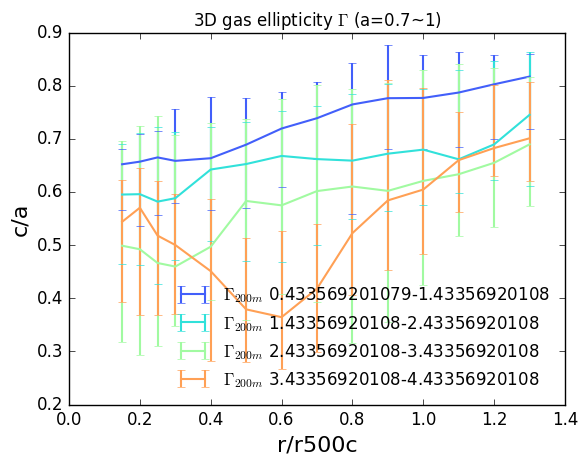

In [7]:
mask=[]
gammabins=np.arange(Gamma.min(),Gamma.max(),1.)
for i in range(len(gammabins)-1):
    mask.append((Gamma<gammabins[i+1])&(Gamma>gammabins[i]))
print len(mask)

cnorm_gamma=colors.Normalize(vmin=Gamma.min(),vmax=Gamma.max())
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)
for jm in range(len(mask)):
    med=[];up=[];down=[]
    print 'sample size:',np.sum(mask[jm])
    color=scalarmap_gamma.to_rgba(jm+1)
    for i in range(1,len(rlist)):
        tmpdata=allelldata[mask[jm]][:,i]
        ellmed=np.percentile(tmpdata[~np.isnan(tmpdata)],50)
        ellup=np.percentile(tmpdata[~np.isnan(tmpdata)],88)
        elldown=np.percentile(tmpdata[~np.isnan(tmpdata)],12)
        med.append(ellmed); up.append(ellup); down.append(elldown)
    med=np.array(med); up=np.array(up); down=np.array(down)
    print len(med),len(up),len(down)
    plt.errorbar(rlist[1:],med,yerr=[med-down,up-med],c=color,label=r'$\Gamma_{200m}$ '+str(gammabins[jm])+'-'+str(gammabins[jm+1]))
plt.legend()
plt.xlabel('r/r500c')
plt.ylabel('c/a')
plt.title(r'3D gas ellipticity $\Gamma$ (a='+str(np.around(a,decimals=2))+'~1)')
plt.savefig('figures/gamma_'+str(a)+'_3D_gas_ell_vs_r_r500c_errorbar.eps')

plt.show()

#### Plot Spearmann coefficient:

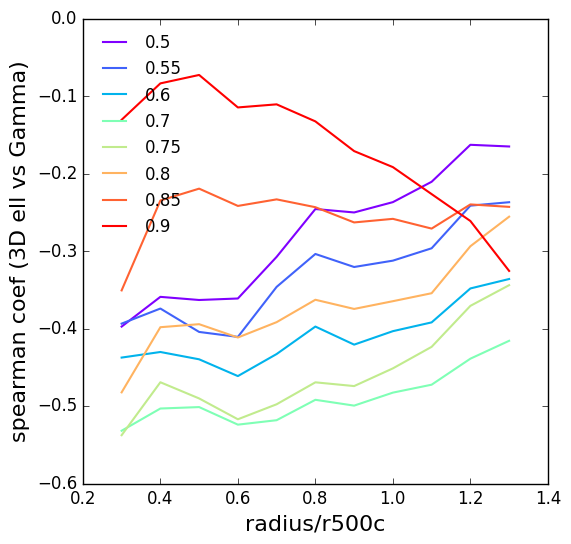

In [8]:
plt.figure(figsize=(6,6))
cnorm_gamma=colors.Normalize(vmin=0.5,vmax=0.9)
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)

for spco_acutgamma in [0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9]:
    spco_Gamma=calc_Gamma(spco_acutgamma)
    spco=[]
    r_spco=[]
    rindex=[4,5,6,7,8,9,10,11,12,13,14]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    plt.plot(r_spco,spco,label=str(spco_acutgamma),c=color)
    plt.legend()
plt.xlabel('radius/r500c')
plt.ylabel('spearman coef (3D ell vs Gamma)')
plt.savefig('spearman_coef.png')
plt.savefig('spearman_coef.eps')

plt.show()

[-0.0411566  -0.03649915 -0.08172058  0.00868685]
[ 0.02922344 -0.01138198 -0.11401409 -0.0647482 ]
[-0.14707773 -0.03976907 -0.04984543 -0.02160084]
[-0.14966489 -0.17955225 -0.20979681 -0.06872401]
[-0.21701417 -0.17772943 -0.15412177 -0.15966295]
[-0.18122256  0.06158392  0.02590206 -0.03205944]
[-0.00335171  0.22034501  0.22147284  0.13628716]
[ 0.30333789  0.25361248  0.38572034  0.29309755]


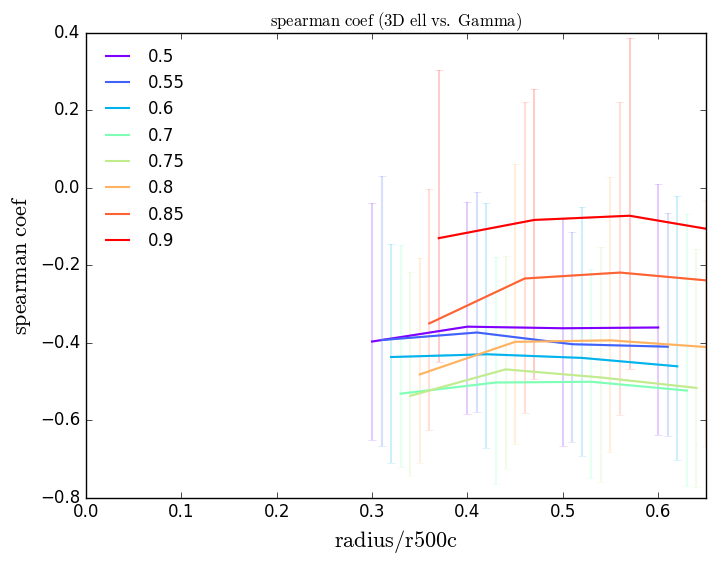

In [11]:
plt.figure(figsize=(8,6))
cnorm_gamma=colors.Normalize(vmin=0.5,vmax=0.9)
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)


for irun,spco_acutgamma in enumerate([0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma)
    spco=[]
    spco_up=[];spco_lo=[]
    r_spco=[]
    rindex=[4,5,6,7]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
        tmpspearmanr=[]
        for j in range(500):
            index=np.random.choice(len(allz0id),int(len(allz0id)*0.9))
            subsampleGamma=[spco_Gamma[i] for i in index]
            subsampleell=[spco_ell_r500c[i] for i in index]
            tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
        spco_up.append(max(tmpspearmanr)),spco_lo.append(min(tmpspearmanr))
    spco=np.array(spco);spco_up=np.array(spco_up);spco_lo=np.array(spco_lo);r_spco=np.array(r_spco)
    print spco_up
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    plt.errorbar(r_spco+0.01*irun,spco,yerr=[spco-spco_lo,spco_up-spco],alpha=0.2,c=color)
    


for irun,spco_acutgamma in enumerate([0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma)
    spco=[]
    r_spco=[]
    rindex=[4,5,6,7]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    r_spco=np.array(r_spco)
    plt.plot(r_spco+0.01*irun,spco,c=color,label=str(spco_acutgamma))
    plt.legend()
plt.xlim([0,0.65])
plt.ylim([-0.8,0.4])


plt.xlabel(r'$\rm radius/r500c$')
plt.ylabel(r'$\rm spearman \ coef$')
plt.title(r'$\rm spearman \ coef \ (3D \ ell \ vs. \ Gamma)$')
plt.savefig('Gasc_spearman_coef_err.png')
# plt.savefig('Gasc_spearman_coef_err.eps')
# plt.savefig('Gasc_spearman_coef_err.pdf')
plt.show()

#### plot Gamma vs. c/a at certain r

In [ ]:
# plt.scatter(Gamma,ell_r500c)
# for i, txt in enumerate(allz0id):
#     txt=str(int(txt))
#     plt.annotate(txt, (Gamma[i],ell_r500c[i]))
# plt.ylim([0.2,1])
# plt.xlim([0,max(Gamma)+0.5])
# plt.xlabel(r'$\Gamma_{200m} \left(a=%.2f - 1\right)$'%np.around(a,decimals=2))
# plt.ylabel(r'$c/a \ \left(r=%.2f  \ r_{500c}\right)$'%rlist[ir])
# plt.annotate('spearmanr='+str(np.around(spearmanr(Gamma,ell_r500c)[0],4)),(0,0.3))

# print pearsonr(Gamma,ell_r500c)
# print spearmanr(Gamma,ell_r500c)


# tmpspearmanr=[]
# for j in range(500):
#     index=np.random.choice(len(allz0id),int(len(allz0id)*0.9))
#     subsampleGamma=[Gamma[i] for i in index]
#     subsampleell=[ell_r500c[i] for i in index]
#     # print 'quiet Gamma~ell pearson',pearsonr(subsampleGamma,subsampleell)
#     tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
# print max(tmpspearmanr),min(tmpspearmanr)
# plt.annotate('('+str(np.around(min(tmpspearmanr),4))+', '+str(np.around(max(tmpspearmanr),4))+')',(0.5,0.25))

# # plt.savefig('Gamma_a='+str(acutGamma)+'vs_ell_'+str(rlist[ir])+'r500c.png')
# plt.savefig('tmp.eps')

# plt.show()



0.6666666666666667

In [20]:
print sid
print len(ell_r500c)

[1.0, 2.0, 3.0, 6.0, 135.0, 9.0, 13.0, 14.0, 15.0, 16.0, 19.0, 21.0, 25.0, 26.0, 27.0, 29.0, 32.0, 33.0, 39.0, 42.0, 44.0, 175.0, 53.0, 54.0, 65.0, 68.0, 69.0, 71.0, 82.0, 83.0, 85.0, 86.0, 732.0, 223.0, 229.0, 104.0, 106.0]
85


1.0 0.59776 1
2.0 0.56159 2
3.0 0.74874 3
4.0 0.52804 4
5.0 0.51267 5
6.0 0.69452 6
7.0 0.73771 7
8.0 0.51499 8
9.0 0.66275 9
10.0 0.63439 10
11.0 0.22135 11
13.0 0.70188 13
14.0 0.65046 14
15.0 0.65126 15
16.0 0.66753 16
17.0 0.49448 17
19.0 0.65778 19
21.0 0.87198 21
23.0 0.30588 23
25.0 0.78981 25
26.0 0.67087 26
27.0 0.70896 27
29.0 0.76728 29
31.0 0.47441 31
32.0 0.6517 32
33.0 0.34524 33
34.0 0.50292 34
35.0 0.75124 35
39.0 0.6734 39
42.0 0.75587 42
44.0 0.74015 44
45.0 0.73929 45
49.0 0.36841 49
50.0 0.74512 50
53.0 0.70038 53
54.0 0.61611 54
55.0 0.60693 55
59.0 0.79761 59
61.0 0.48334 61
63.0 0.53004 63
65.0 0.65257 65
66.0 0.52469 66
68.0 0.58031 68
69.0 0.48158 69
71.0 0.66736 71
73.0 0.54005 73
77.0 0.52981 77
78.0 0.7289 78
79.0 0.36334 79
80.0 0.49825 80
81.0 0.74256 81
82.0 0.68925 82
83.0 0.71581 83
85.0 0.69425 85
86.0 0.64407 86
88.0 0.56914 88
91.0 0.52863 91
96.0 0.4501 96
98.0 0.46335 98
100.0 0.8331 100
104.0 0.7202 104
106.0 0.83385 106
108.0 0.71839 108
125.0 0.

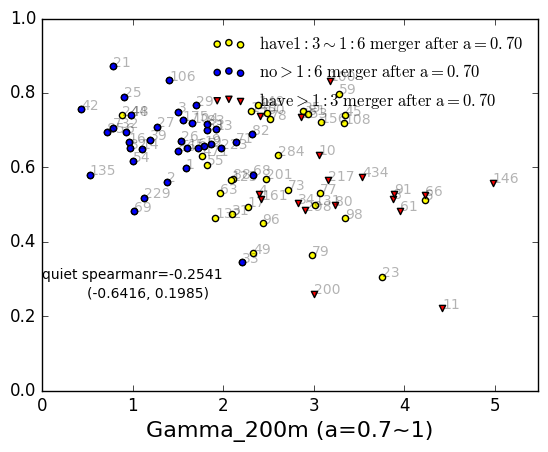

all Gamma~ell pearson (-0.42049910468195717, 6.1538581325176357e-05)
all Gamma~ell  SpearmanrResult(correlation=-0.37336329880789526, pvalue=0.00043244187480246353)
quiet Gamma~ell pearson (-0.32755302674513587, 0.0068147475613910564)
quiet Gamma~ell  SpearmanrResult(correlation=-0.25413041743155879, pvalue=0.037967688764721286)


In [33]:
acutmerger=0.7 # within 0.7-1 no major merger

mr=3 #merger mass ratio
selectid=merger['z0_parent_id'][~(merger['1:'+str(mr)+' after a='+str(acutmerger)])]
selectid=list(set(selectid))

smr=6 #merger mass ratio for silent clusters
sid=merger['z0_parent_id'][~(merger['1:'+str(smr)+' after a='+str(acutmerger)])]
sid=list(set(sid))

from scipy import misc
import glob
import matplotlib.image as mpimg

silentGamma=[]
silentell=[]
quietGamma=[]
quietell=[]
vioGamma=[]
vioell=[]
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid :
        quietGamma.append(Gamma[i])
        quietell.append(ell_r500c[i])
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],ell_r500c[i]),alpha=0.3)
        if ids in sid:
            silentGamma.append(Gamma[i])
            silentell.append(ell_r500c[i])
    else:
        vioGamma.append(Gamma[i])
        vioell.append(ell_r500c[i])
        txt=str(int(allz0id[i]))
        
        plt.annotate(txt, (Gamma[i],ell_r500c[i]),alpha=0.3)
    print ids,ell_r500c[i],txt
    
plt.ylim([0.,1])
plt.xlim([0,max(Gamma)+0.5])
plt.scatter(quietGamma,quietell,c='yellow',label=r'$\rm have 1:%d \sim 1:%d \ merger \ after \ a=%.2f$'%(mr,smr,acutmerger),alpha=1.,s=20)
plt.scatter(silentGamma,silentell,c='blue',label=r'$\rm no >1:%d \ merger \ after \ a=%.2f$'%(smr,acutmerger),alpha=1.,s=20)

plt.scatter(vioGamma,vioell,c='red',label=r'$\rm have >1:%d \ merger \ after \ a=%.2f$'%(mr,acutmerger),marker='v')
plt.xlabel('Gamma_200m (a='+str(np.around(a,decimals=2))+'~1)')
# plt.ylabel('c/a (r='+str(rlist[ir])+' r500c)')
plt.legend()

print selectid
tmpspearmanr=[]
print len(selectid),int(len(selectid)*0.9)
for j in range(500):
    index=np.random.choice(len(selectid),int(len(selectid)*0.9))
    subsampleGamma=[quietGamma[i] for i in index]
    subsampleell=[quietell[i] for i in index]
    tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
print max(tmpspearmanr),min(tmpspearmanr)
plt.annotate('quiet spearmanr='+str(np.around(spearmanr(quietGamma,quietell)[0],4)),(0,0.3))
plt.annotate('('+str(np.around(min(tmpspearmanr),4))+', '+str(np.around(max(tmpspearmanr),4))+')',(0.5,0.25))

# plt.savefig('quiet_'+str(mr)+'_Gamma_a='+str(acutGamma)+'vs_ell_'+str(rlist[ir])+'r500c.png')
plt.savefig('tmp.png')
# plt.savefig('Gamma'+str(acutgamma)+'ell'+str(rlist[ir])+'.png')


plt.show()
print 'all Gamma~ell pearson',pearsonr(Gamma,ell_r500c)
print 'all Gamma~ell ',spearmanr(Gamma,ell_r500c)
print 'quiet Gamma~ell pearson',pearsonr(quietGamma,quietell)
print 'quiet Gamma~ell ',spearmanr(quietGamma,quietell)





# nimg=9
# fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))
# for i,ids in enumerate(selectid):
#     ids=int(ids)
#     img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_'+str(rlist[ir])+'r500c_ell3D_0.png')
    
#     axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
#     axarr[i/nimg,i%nimg].imshow(img)
#     axarr[i/nimg,i%nimg].set_xticks([])
#     axarr[i/nimg,i%nimg].set_yticks([])

# plt.show()
# fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))
# for i,ids in enumerate(selectid):
#     ids=int(ids)
#     img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_'+str(rlist[ir])+'r500c_ell3D_1.png')
    
#     axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
#     axarr[i/nimg,i%nimg].imshow(img)
#     axarr[i/nimg,i%nimg].set_xticks([])
#     axarr[i/nimg,i%nimg].set_yticks([])
# plt.show()
# fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))
# for i,ids in enumerate(selectid):
#     ids=int(ids)
#     img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_'+str(rlist[ir])+'r500c_ell3D_2.png')
    
#     axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
#     axarr[i/nimg,i%nimg].imshow(img)
#     axarr[i/nimg,i%nimg].set_xticks([])
#     axarr[i/nimg,i%nimg].set_yticks([])
# plt.show()


0.5


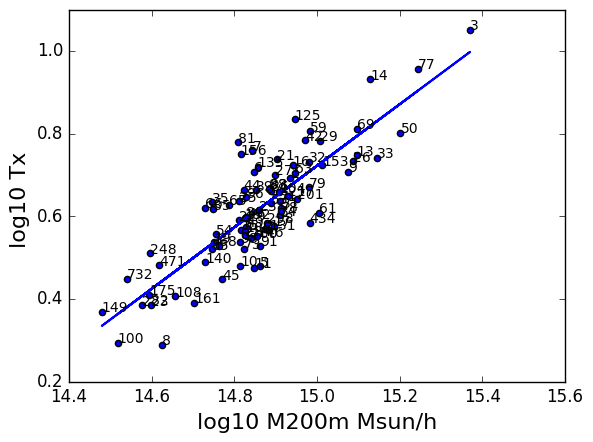

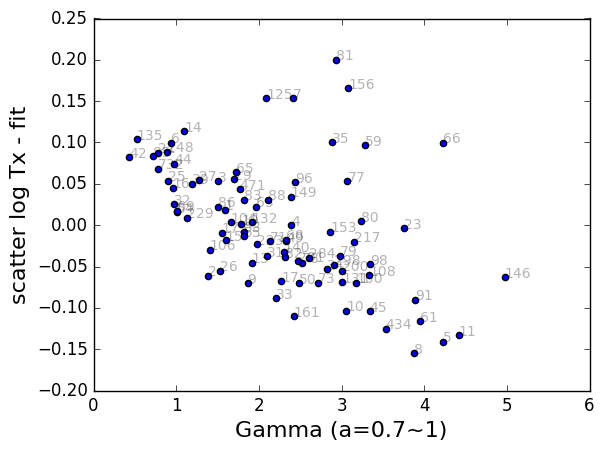

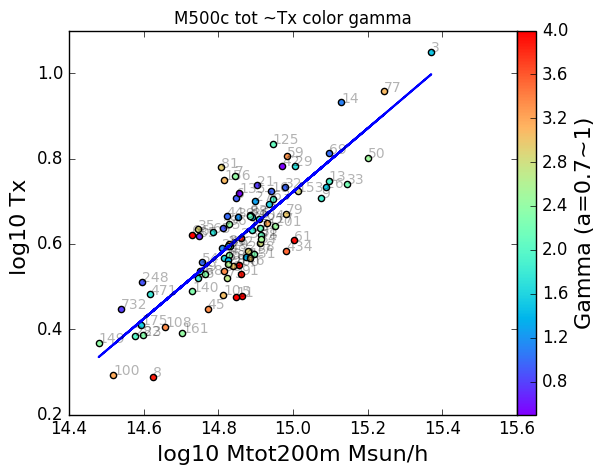

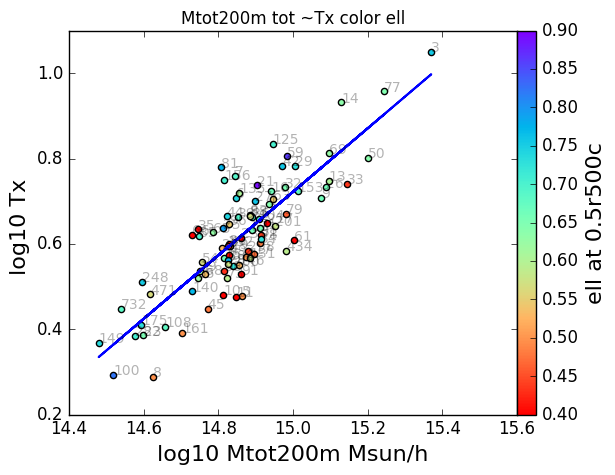

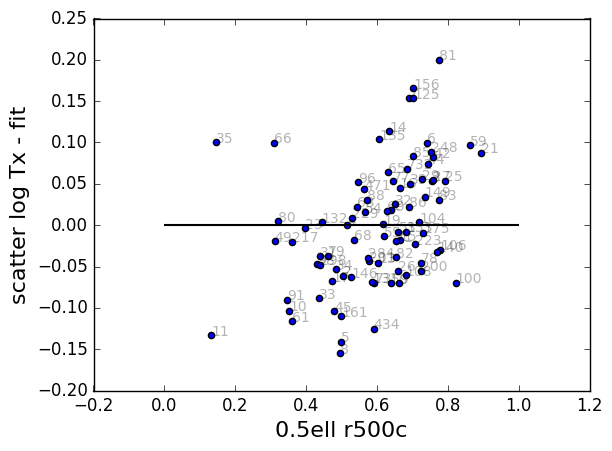

In [30]:
ir=6
print rlist[ir]
ell_r500c=allelldata[:,ir]

from load_data import *
obs=Tx
obsstr='Tx';
unitstr=' '


slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot200m),np.log10(obs))

line = slope*np.log10(Mtot200m)+intercept


plt.scatter(np.log10(Mtot200m),np.log10(obs))
for i, txt in enumerate(allz0id):
    txt=str(int(txt))
    plt.annotate(txt, (np.log10(Mtot200m)[i],np.log10(obs)[i]))
    
plt.plot(np.log10(Mtot200m), line)

plt.xlabel('log10 M200m Msun/h')
plt.ylabel('log10 '+obsstr+unitstr)
plt.show()


# scatter

plt.scatter(Gamma,(np.log10(obs)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
#     if ids in selectid:
    txt=str(int(allz0id[i]))
    plt.annotate(txt, (Gamma[i],(np.log10(obs)-line)[i]),alpha=0.3)
plt.xlabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('scatter log '+obsstr+' - fit')
plt.savefig('figures/scatter_gamma_'+obsstr+'.eps')
plt.savefig('figures/scatter_gamma_'+obsstr+'.png')


plt.show()



import matplotlib
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax.plot(np.log10(Mtot200m), line)


cnormgamma=colors.Normalize(vmin=0.5,vmax=4)
scalarmapgamma=cm.ScalarMappable(norm=cnormgamma,cmap=cm.rainbow)
cmap='rainbow'

for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]

    color=scalarmapgamma.to_rgba(Gamma[i])
    ax.scatter(np.log10(Mtot200m[i]),np.log10(obs[i]),c=color)
    
#     if ids in selectid:
    txt=str(int(allz0id[i])) 
    ax.annotate(txt, (np.log10(Mtot200m)[i],np.log10(obs)[i]),alpha=0.3)
plt.xlabel('log10 Mtot200m Msun/h')
plt.ylabel('log10 '+obsstr+unitstr)

colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormgamma)
colorb_ax.set_ylabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')

ax.set_title('M500c tot ~'+obsstr+' color gamma')
plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_gamma.eps')
plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_gamma.png')



plt.show()



import matplotlib
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax.plot(np.log10(Mtot200m), line)


cnormell=colors.Normalize(vmin=0.4,vmax=.9)
scalarmapell=cm.ScalarMappable(norm=cnormell,cmap=cm.rainbow_r)
cmap=cm.rainbow_r

for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    #color-code
    color=scalarmapell.to_rgba(ell_r500c[i])
    ax.scatter(np.log10(Mtot200m[i]),np.log10(obs[i]),c=color)
    #text id
#     if ids in selectid:
    txt=str(int(allz0id[i])) 
    ax.annotate(txt, (np.log10(Mtot200m)[i],np.log10(obs)[i]),alpha=0.3)
plt.xlabel('log10 Mtot200m Msun/h')
plt.ylabel('log10 '+obsstr+unitstr)

colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormell)
colorb_ax.set_ylabel('ell at '+str(rlist[ir])+'r500c')


ax.set_title('Mtot200m tot ~'+obsstr+' color ell')

plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_ell.eps')
plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_ell.png')


plt.show()

# scatter

plt.scatter(ell_r500c,(np.log10(obs)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
#     if ids in selectid:
    txt=str(int(allz0id[i]))
    plt.annotate(txt, (ell_r500c[i],(np.log10(obs)-line)[i]),alpha=0.3)
plt.xlabel(str(rlist[ir])+'ell r500c')
plt.ylabel('scatter log '+obsstr+' - fit')
plt.hlines(0,0,1)

plt.savefig('tmp.png')
plt.show()




#### Plot scaling relation

$$M_{gas}\propto M$$
$$T\propto \Delta^{1/3}M^{2/3}$$
$$L_{bol}\propto \Delta^{7/6}M^{4/3}$$
$$L_{T>2keV}\propto \Delta M$$
$$Y\propto \Delta^{1/3} M^{5/3}$$
### fix slope or not?



In [39]:
reload(load_data)

smt contain info about all z=0 CLs' mass at different epoch
 merger (calc by r200m) contain T/F info about whether CL experienced merger after a=?
groupbyz0id.get_group(CLno) gives all info for CLno mass(z)
allelldata, 85*15, 85 CLs, [0] is CL id, following 3D gas ell at rlist r500c
e.g. allelldata[:,0] gives all CLids, in increasing number order
 allelldata[?,4] gives CL? ell at rlist[4]=0.3 r500c


<module 'load_data' from 'load_data.py'>

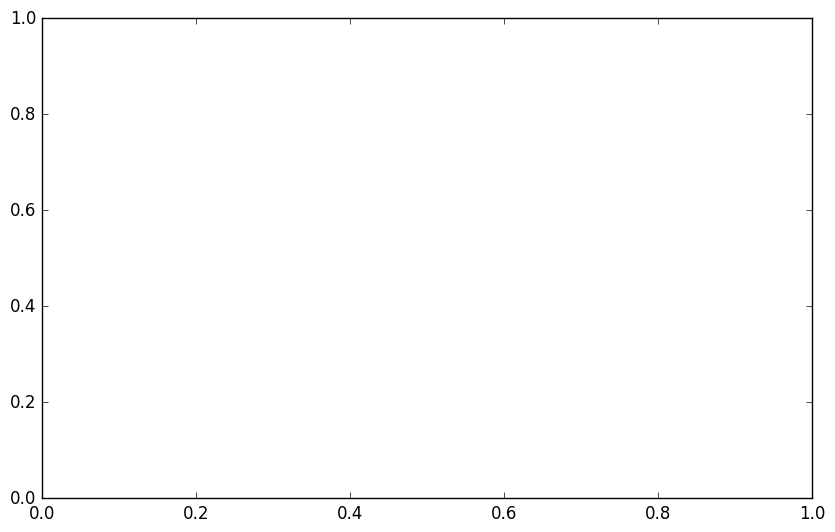

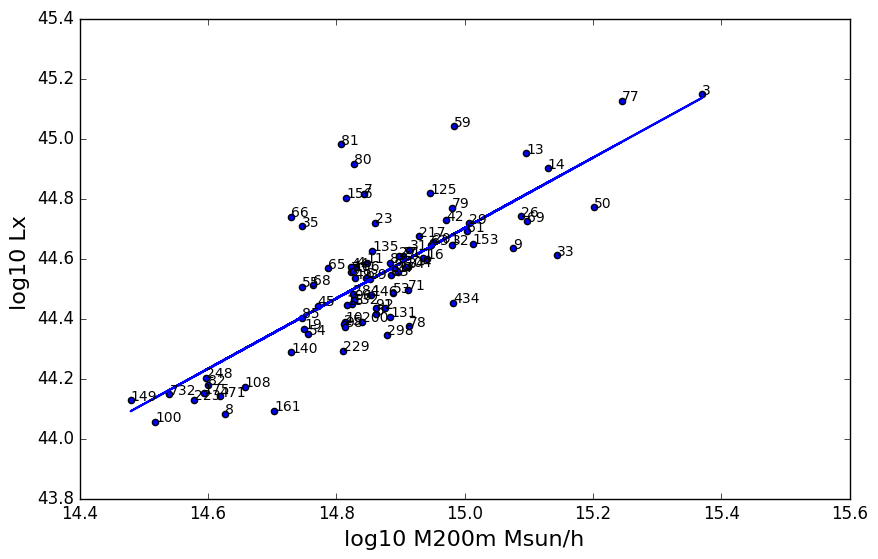

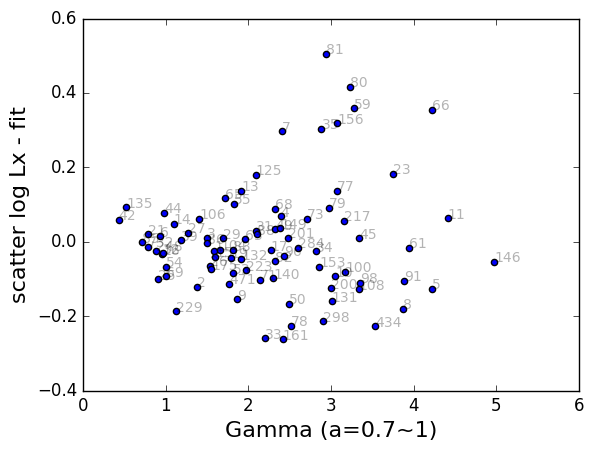

NameError: name 'selectid' is not defined

In [9]:
from load_data import *
obs=Lx
obsstr='Lx';
unitstr=' '


slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot200m),np.log10(obs))

line = slope*np.log10(Mtot200m)+intercept


plt.scatter(np.log10(Mtot200m),np.log10(obs))
for i, txt in enumerate(allz0id):
    txt=str(int(txt))
    plt.annotate(txt, (np.log10(Mtot200m)[i],np.log10(obs)[i]))
    
plt.plot(np.log10(Mtot200m), line)

plt.xlabel('log10 M200m Msun/h')
plt.ylabel('log10 '+obsstr+unitstr)
plt.show()


# scatter

plt.scatter(Gamma,(np.log10(obs)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
#     if ids in selectid:
    txt=str(int(allz0id[i]))
    plt.annotate(txt, (Gamma[i],(np.log10(obs)-line)[i]),alpha=0.3)
plt.xlabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('scatter log '+obsstr+' - fit')
plt.savefig('figures/scatter_gamma_'+obsstr+'.eps')
plt.savefig('figures/scatter_gamma_'+obsstr+'.png')


plt.show()



import matplotlib
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax.plot(np.log10(Mtot200m), line)


cnormgamma=colors.Normalize(vmin=0.5,vmax=4)
scalarmapgamma=cm.ScalarMappable(norm=cnormgamma,cmap=cm.rainbow)
cmap='rainbow'

for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]

    color=scalarmapgamma.to_rgba(Gamma[i])
    ax.scatter(np.log10(Mtot200m[i]),np.log10(obs[i]),c=color)
    
    if ids in selectid:
        txt=str(int(allz0id[i])) 
        ax.annotate(txt, (np.log10(Mtot200m)[i],np.log10(obs)[i]),alpha=0.3)
plt.xlabel('log10 Mtot200m Msun/h')
plt.ylabel('log10 '+obsstr+unitstr)

colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormgamma)
colorb_ax.set_ylabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')

ax.set_title('M500c tot ~'+obsstr+' color gamma')
plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_gamma.eps')
plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_gamma.png')



plt.show()



import matplotlib
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax.plot(np.log10(Mtot200m), line)


cnormell=colors.Normalize(vmin=0.4,vmax=.9)
scalarmapell=cm.ScalarMappable(norm=cnormell,cmap=cm.rainbow_r)
cmap=cm.rainbow_r

for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    #color-code
    color=scalarmapell.to_rgba(ell_r500c[i])
    ax.scatter(np.log10(Mtot200m[i]),np.log10(obs[i]),c=color)
    #text id
    if ids in selectid:
        txt=str(int(allz0id[i])) 
        ax.annotate(txt, (np.log10(Mtot200m)[i],np.log10(obs)[i]),alpha=0.3)
plt.xlabel('log10 Mtot200m Msun/h')
plt.ylabel('log10 '+obsstr+unitstr)

colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormell)
colorb_ax.set_ylabel('ell at '+str(rlist[ir])+'r500c')


ax.set_title('Mtot200m tot ~'+obsstr+' color ell')

plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_ell.eps')
plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_ell.png')


plt.show()

# scatter

plt.scatter(ell_r500c,(np.log10(obs)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
#     if ids in selectid:
    txt=str(int(allz0id[i]))
    plt.annotate(txt, (ell_r500c[i],(np.log10(obs)-line)[i]),alpha=0.3)
plt.xlabel(str(rlist[ir])+'ell r500c')
plt.ylabel('scatter log '+obsstr+' - fit')
plt.hlines(0,0,1)

plt.savefig('tmp.png')
plt.show()




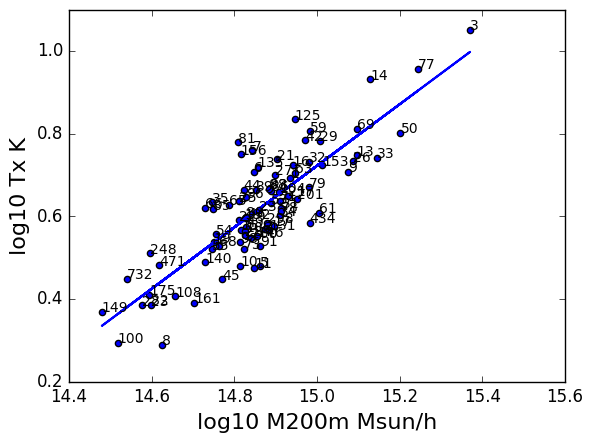

In [7]:
from load_data import *

obsstr='Tx';
unitstr=' K'
obs=Tx

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot200m),np.log10(obs))

line = slope*np.log10(Mtot200m)+intercept


plt.scatter(np.log10(Mtot200m),np.log10(obs))
for i, txt in enumerate(allz0id):
    txt=str(int(txt))
    plt.annotate(txt, (np.log10(Mtot200m)[i],np.log10(obs)[i]))
    
plt.plot(np.log10(Mtot200m), line)

plt.xlabel('log10 M200m Msun/h')
plt.ylabel('log10 '+obsstr+unitstr)
plt.show()


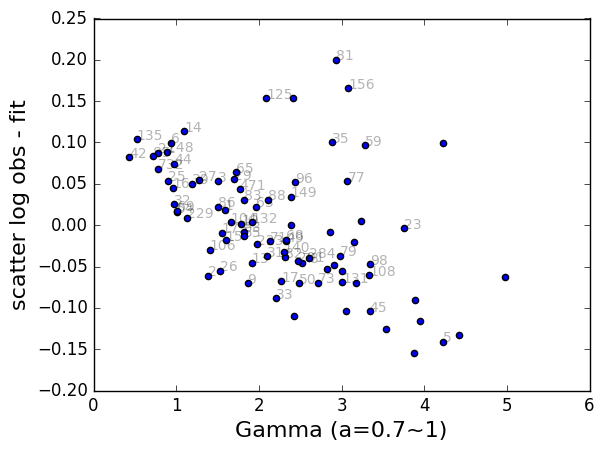

In [20]:
# scatter


plt.scatter(Gamma,(np.log10(obs)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],(np.log10(obs)-line)[i]),alpha=0.3)
plt.xlabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('scatter log obs - fit')
plt.savefig('figures/scatter_gamma_'+obsstr+'.eps')
plt.savefig('figures/scatter_gamma_'+obsstr+'.png')


plt.show()



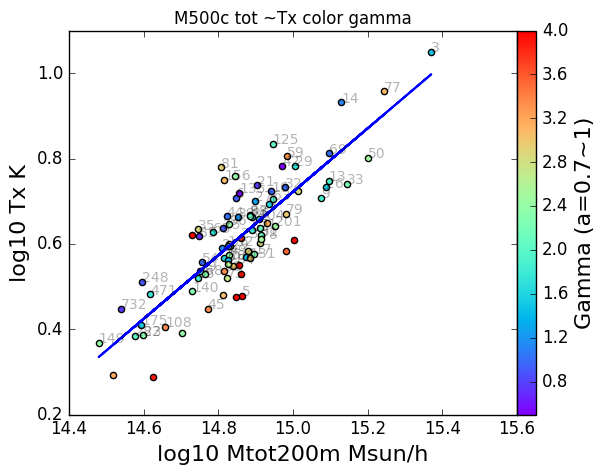

In [21]:
import matplotlib
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax.plot(np.log10(Mtot200m), line)


cnormgamma=colors.Normalize(vmin=0.5,vmax=4)
scalarmapgamma=cm.ScalarMappable(norm=cnormgamma,cmap=cm.rainbow)
cmap='rainbow'

for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]

    color=scalarmapgamma.to_rgba(Gamma[i])
    ax.scatter(np.log10(Mtot200m[i]),np.log10(obs[i]),c=color)
    
    if ids in selectid:
        txt=str(int(allz0id[i])) 
        ax.annotate(txt, (np.log10(Mtot200m)[i],np.log10(obs)[i]),alpha=0.3)
plt.xlabel('log10 Mtot200m Msun/h')
plt.ylabel('log10 '+obsstr+unitstr)

colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormgamma)
colorb_ax.set_ylabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')

ax.set_title('M500c tot ~'+obsstr+' color gamma')
plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_gamma.eps')
plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_gamma.png')



plt.show()

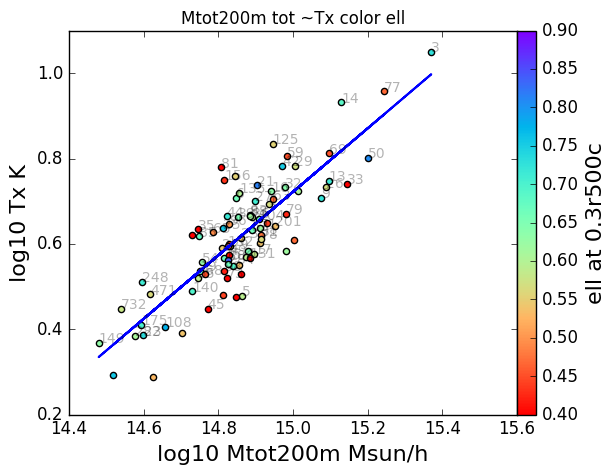

In [24]:
import matplotlib
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax.plot(np.log10(Mtot200m), line)


cnormell=colors.Normalize(vmin=0.4,vmax=.9)
scalarmapell=cm.ScalarMappable(norm=cnormell,cmap=cm.rainbow_r)
cmap=cm.rainbow_r

for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    #color-code
    color=scalarmapell.to_rgba(ell_r500c[i])
    ax.scatter(np.log10(Mtot200m[i]),np.log10(obs[i]),c=color)
    #text id
    if ids in selectid:
        txt=str(int(allz0id[i])) 
        ax.annotate(txt, (np.log10(Mtot200m)[i],np.log10(obs)[i]),alpha=0.3)
plt.xlabel('log10 Mtot200m Msun/h')
plt.ylabel('log10 '+obsstr+unitstr)

colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormell)
colorb_ax.set_ylabel('ell at '+str(rlist[ir])+'r500c')


ax.set_title('Mtot200m tot ~'+obsstr+' color ell')

plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_ell.eps')
plt.savefig('figures/scaling_Mtot200m_'+obsstr+'_color_ell.png')


plt.show()

plot clusters with recent merger


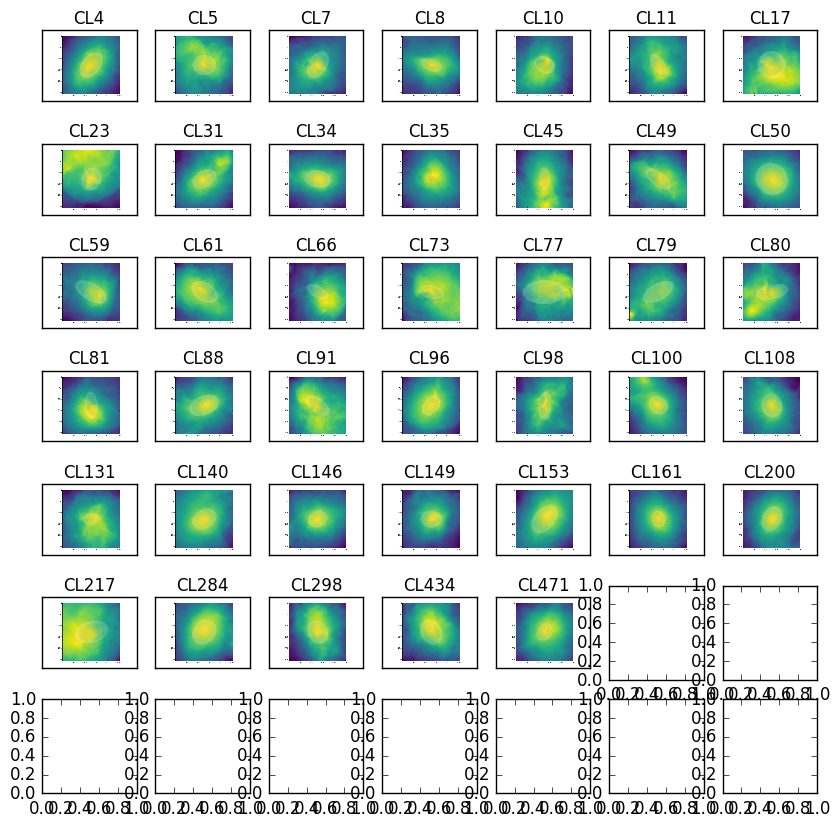

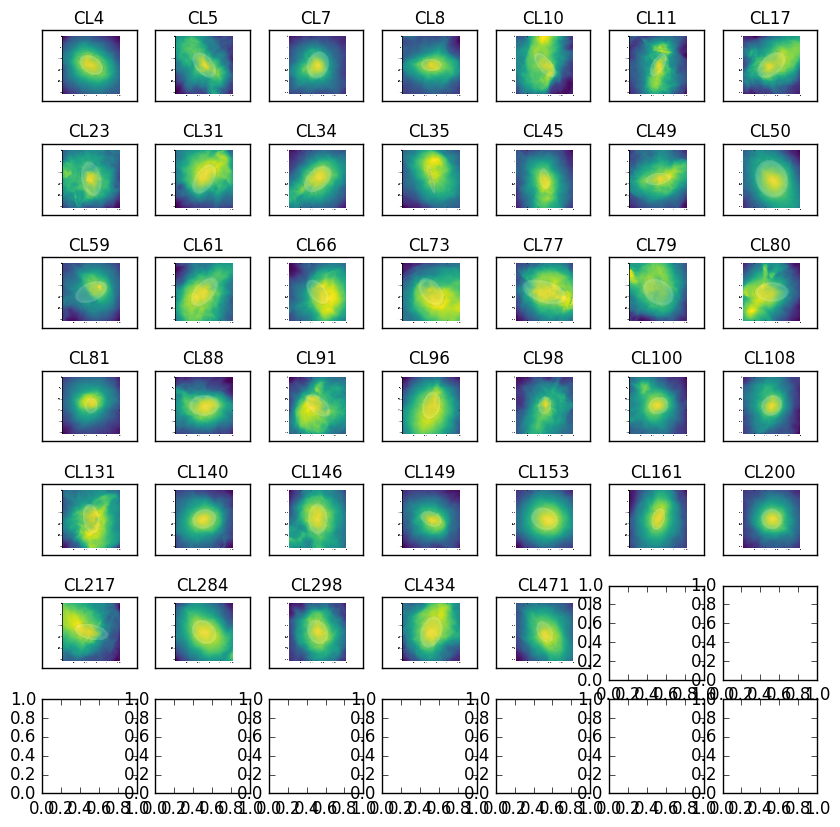

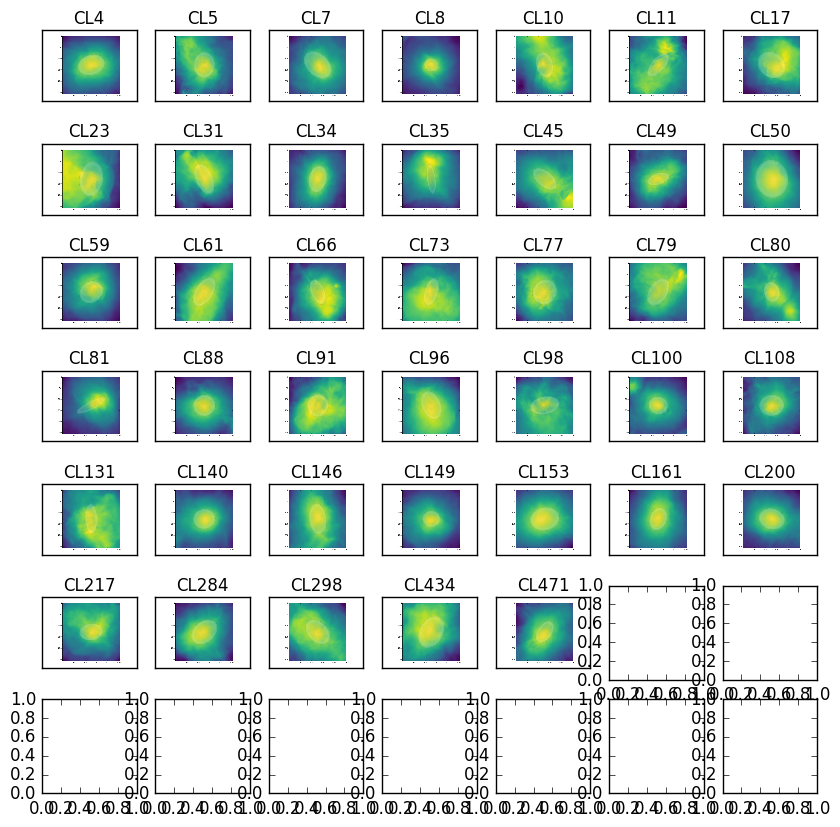

In [59]:
###### plot clusters with recent merger ######
print 'plot clusters with recent merger'
withmerger=merger['z0_parent_id'][(merger['1:5 after a=0.7'])]
nimg=7

fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))
for i,ids in enumerate(withmerger):
    ids=int(ids)
    img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_0.3r500c_ell3D_0.png')
    
    axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
    axarr[i/nimg,i%nimg].imshow(img)
    axarr[i/nimg,i%nimg].set_xticks([])
    axarr[i/nimg,i%nimg].set_yticks([])
plt.show()

fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))


for i,ids in enumerate(withmerger):
    ids=int(ids)
    img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_0.3r500c_ell3D_1.png')
    
    axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
    axarr[i/nimg,i%nimg].imshow(img)
    axarr[i/nimg,i%nimg].set_xticks([])
    axarr[i/nimg,i%nimg].set_yticks([])
plt.show()

fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))


for i,ids in enumerate(withmerger):
    ids=int(ids)
    img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_0.3r500c_ell3D_2.png')
    
    axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
    axarr[i/nimg,i%nimg].imshow(img)
    axarr[i/nimg,i%nimg].set_xticks([])
    axarr[i/nimg,i%nimg].set_yticks([])
plt.show()




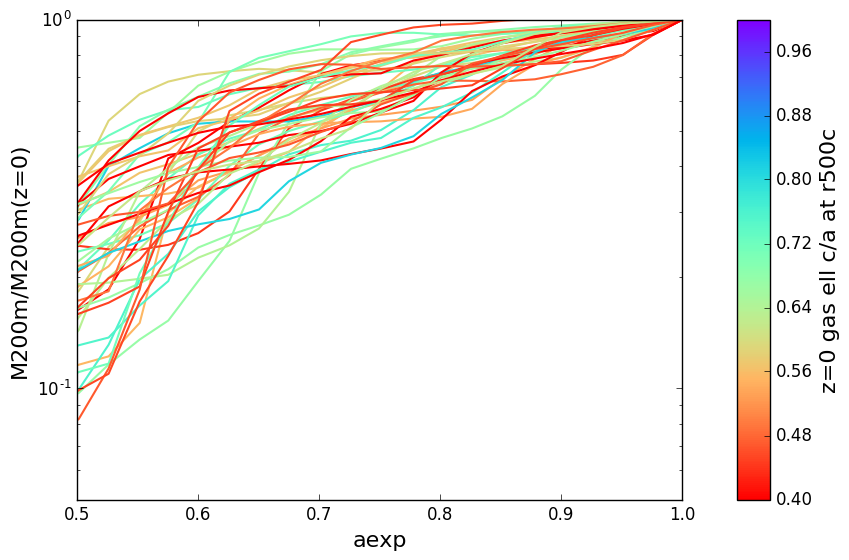

In [167]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
cnorm=colors.Normalize(vmin=0.4,vmax=1.)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(11, 6))
ax = fig.add_axes([0.1, 0.1, 0.55, 0.8])

for i,CLid in enumerate(selectid):
    tmpdata=groupbyz0id.get_group(CLid)
    ell=ell_r500c[i]
    color=scalarmap.to_rgba(ell)
    M0= tmpdata['M_total_200m'].iloc[0]
    ax.plot(tmpdata['aexp'],(tmpdata['M_total_200m'])/M0,c=color)#,label='ell='+str(ell),alpha=0.7)
    plt.yscale('log')
plt.xlim([0.5,1])
plt.xlabel('aexp')
plt.ylabel('M200m/M200m(z=0)')
plt.ylim([5e-2,1e0])
colorbar_ax = fig.add_axes([0.7, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
# fig.colorbar(scalarmap.set_array(), cax=colorbar_ax)
plt.ylabel('z=0 gas ell c/a at r500c')
#plt.savefig('MAH_all.png')
plt.show()

10 11 31 33 35 45 49 59 61 63 65 66 68 69 CLid 69.0
73 77 79 80 81 91 98 131 132 156 217 0.70202020202
25 1


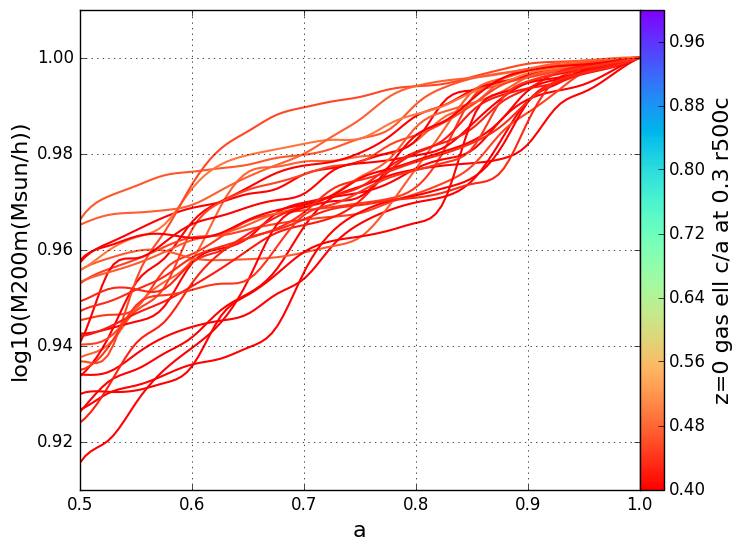

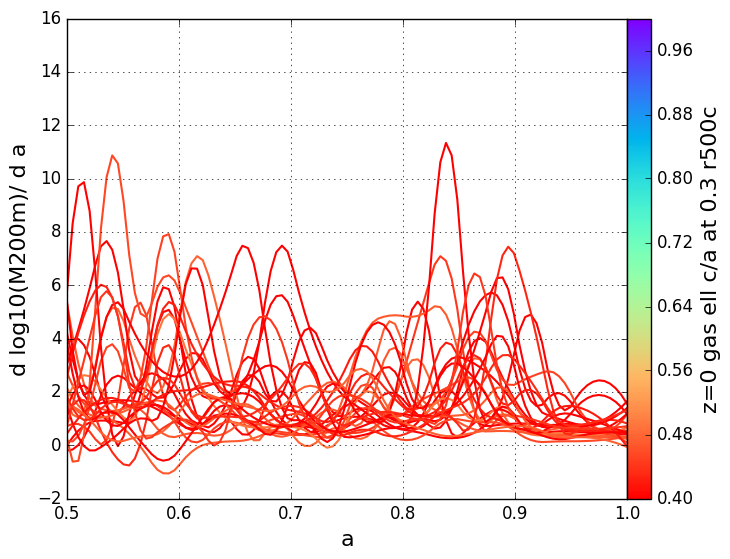

In [168]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=1.)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(8, 6))
fig2=plt.figure(figsize=(8, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,100)

count=0
subcnt=0
for CLid in allz0id:
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(allz0id==CLid)[0][0]
    ell=ell_r500c[i]
    
    if ell<0.5:
        print int(CLid),
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
        if (deriv(aexp_sample)[40:]<2).all():
            print 'CLid',CLid
            subcnt+=1
print aexp_sample[40]
print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')

colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])
ax2.set_ylim([-2,16])
ax2.set_ylabel('d log10(M200m)/ d a')

ax2.set_xlabel('a')


ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])


matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)


colorbar_ax.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')


# fig.savefig('ell<0.5_MAH.png')
# fig2.savefig('ell<0.5_MAH_deriv.png')


# fig.colorbar(scalarmap.set_array(), cax=colorbar_ax)
# plt.ylabel('z=0 gas ell c/a at r500c')
plt.show()

3 CLid 3.0
9 13 21 CLid 21.0
25 27 CLid 27.0
42 CLid 42.0
44 CLid 44.0
50 82 83 100 106 108 175 248 0.70202020202
16 5


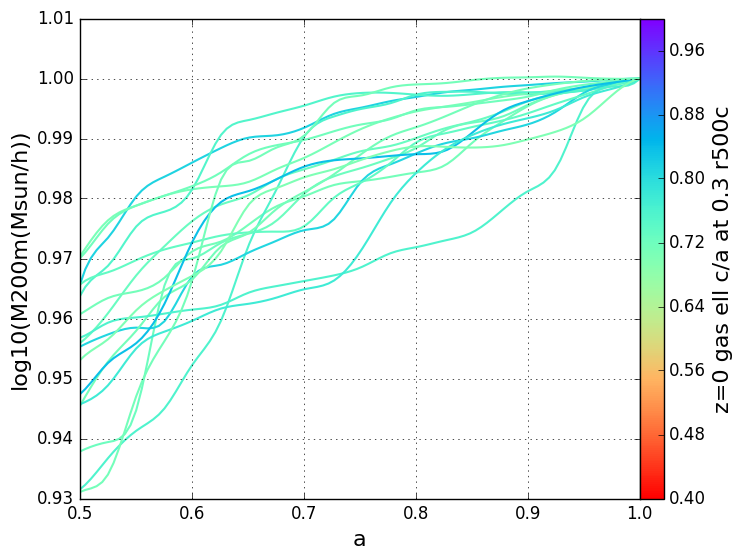

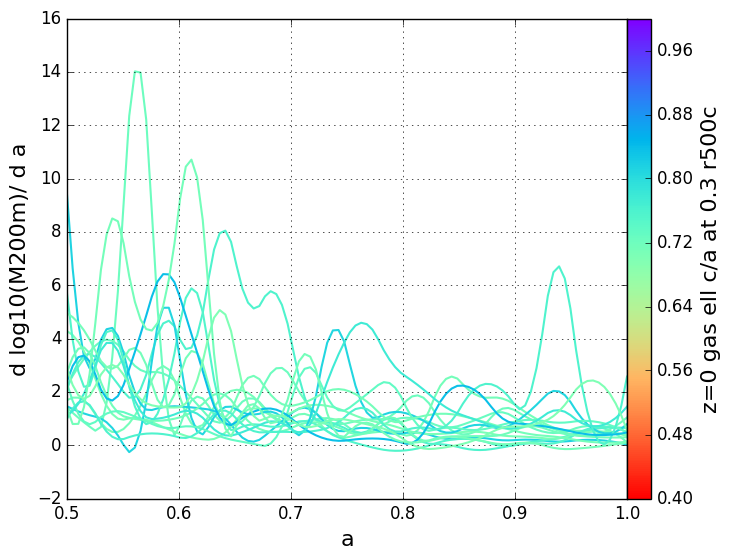

In [169]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=1.)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(8, 6))
fig2=plt.figure(figsize=(8, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,100)

count=0
subcnt=0
for CLid in allz0id:
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(allz0id==CLid)[0][0]
    ell=ell_r500c[i]
    
    if ell>0.7:
        print int(CLid),
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
        if (deriv(aexp_sample)[40:]<2).all():
            print 'CLid',CLid
            subcnt+=1
print aexp_sample[40]
print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')

colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])
ax2.set_ylim([-2,16])
ax2.set_ylabel('d log10(M200m)/ d a')

ax2.set_xlabel('a')


ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])


matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)


colorbar_ax.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')


# fig.savefig('ell<0.5_MAH.png')
# fig2.savefig('ell<0.5_MAH_deriv.png')


# fig.colorbar(scalarmap.set_array(), cax=colorbar_ax)
# plt.ylabel('z=0 gas ell c/a at r500c')
plt.show()

In [49]:
cnt=0
ell2d=[]

CLtmp=[]
for direc in 'xyz':
    tmp=[]
    for clid in allz0id:
        with open('../data/spa/CL'+str(int(clid))+'_Lv6_z0.15_expt100ks_Chandra_dir'+direc+'_ell.reg') as f:
            for i, l in enumerate(f):
                if i==5:
                    remember=l
            if i==8: 
                if direc=='x':
                    CLtmp.append(clid)
                frac=remember.split(',')
                aax=float(frac[-3]);bax=float(frac[-2])
                if aax==0:
                    tmp.append(1.)
                else:
                    tmp.append(bax/aax)
    tmp=np.array(tmp)
    if direc=='x':
        ell2d=np.copy(tmp)
    else:
        ell2d=np.minimum(tmp,ell2d)
            
print len(CLtmp),ell2d

85 [ 0.90216001  0.80678751  0.88058519  0.73727488  0.79848075  0.88922412
  0.68740135  1.          0.89194413  0.88470149  0.82203877  0.87216259
  0.89993958  0.80696482  0.8802732   0.88020375  0.64754267  0.85473444
  0.76425972  0.84581989  0.82920968  0.79739466  1.          0.92954203
  0.82753318  0.97600801  0.92283346  0.86175939  0.84769956  0.84454425
  0.92400339  0.62552148  0.89807803  0.74097379  0.69706985  0.86317274
  1.          0.80747084  1.          0.82333852  0.8747963   0.8684869
  0.78275896  0.95937837  0.84663587  0.83985653  0.8893063   0.71984185
  0.85324411  0.68918463  0.88397979  0.72886358  0.89650375  0.8400215
  0.89192114  0.86058946  0.90073657  0.7419229   0.8765837   1.
  0.84357127  0.92540106  0.77377402  0.88552473  0.92665449  0.71419597
  0.90434509  0.80724593  0.70147428  0.83310934  0.73433568  1.
  0.60068828  0.65354324  0.89418048  0.94057979  0.88907515  0.77882183
  0.76611535  0.78990513  0.72886354  0.73689804  1.          0.74

In [54]:
cnt=0
cs2d=[]
CLtmp=[]
for direc in 'xyz':
    tmp=[]
    for clid in allz0id:
        with open('../data/spa/CL'+str(int(clid))+'_Lv6_z0.15_expt100ks_Chandra_dir'+direc+'_cs.reg') as f:
            for i, l in enumerate(f):
                if i==5:
                    remember=l
                    print remember
            if i==8: 
                if direc=='x':
                    CLtmp.append(clid)
                veclen=float(remember.split(',')[2])
                tmp.append(veclen)
    tmp=np.array(tmp)
    if direc=='x':
        cs2d=np.copy(tmp)
    else:
        cs2d=np.maximum(tmp,cs2d)
            
print len(CLtmp),cs2d

# vector(123.736,128.294,1.74839,97.8239) vector=1

# vector(128,133,7.51309,-0.0730191) vector=1

# vector(131,137,4.10185,-61.0788) vector=1

# vector(132,128,14.7293,122.292) vector=1

# vector(121.262,108.629,25.2,69.2739) vector=1

# vector(130,130,5.68036,25.8569) vector=1

# vector(136,130,10.7243,-32.0094) vector=1

# vector(131,134,0,0) vector=1

# vector(136,127,10.1662,-148.96) vector=1

# vector(125,133,3.96185,9.40358) vector=1

# vector(145,137,24.7869,-164.768) vector=1

# vector(134,133,13.3832,-61.7828) vector=1

# vector(134,135,5.62573,-77.4215) vector=1

# vector(130.938,139.661,6.8422,39.2304) vector=1

# vector(129.349,122.667,2.36098,37.917) vector=1

# vector(169.636,155.201,8.52974,-108.087) vector=1

# vector(129,131,9.05637,-34.0328) vector=1

# vector(134.896,129.102,3.9783,34.1576) vector=1

# vector(51,123,34.6377,0.907241) vector=1

# vector(131.722,123.696,3.86785,47.4081) vector=1

# vector(138,133,0,0) vector=1

# vector(130.739,131.827,2.43815,-136.25

0.892066861739 2.28129857582e-30 0.0605437236897


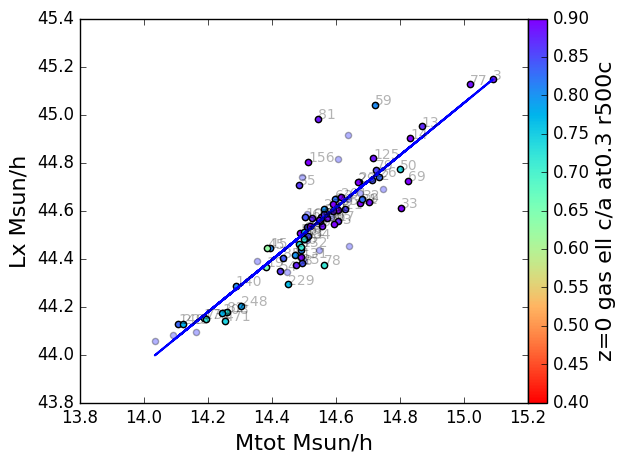

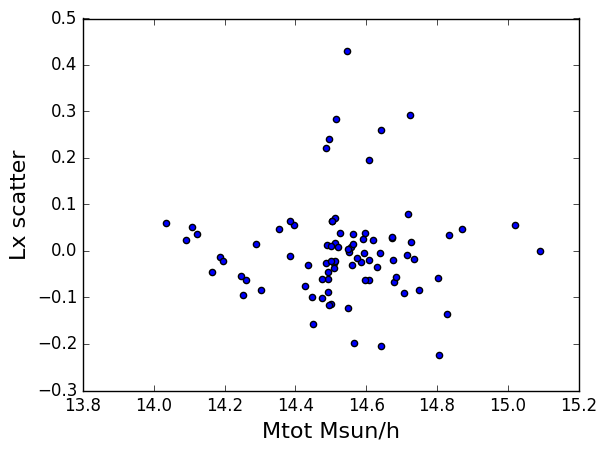

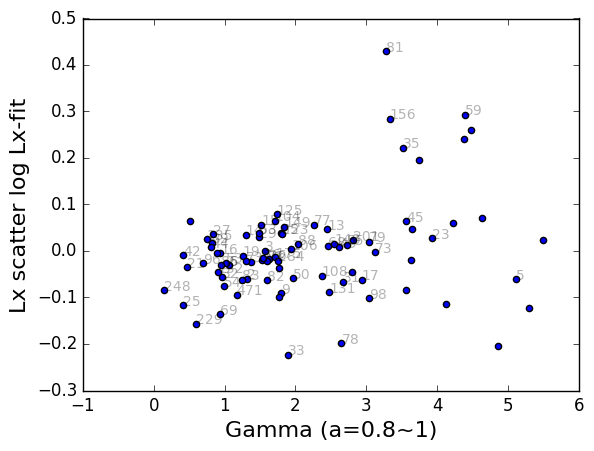

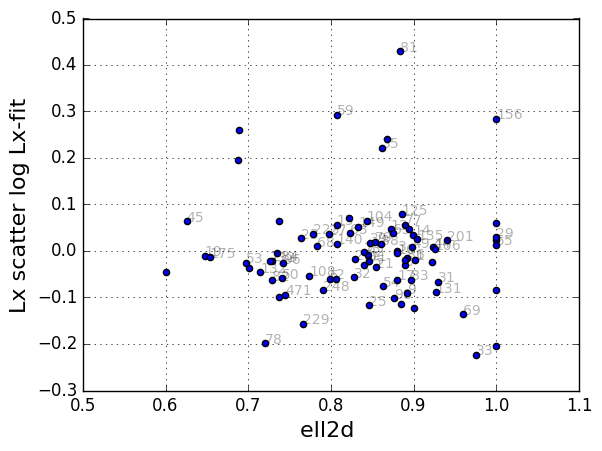

In [57]:
# Generated linear fit
import matplotlib
cnorm=colors.Normalize(vmin=0.4,vmax=.9)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig=plt.figure()
fig.add_axes([0.1, 0.1, 0.7, 0.8])
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot200m),np.log10(Lx))
line = slope*np.log10(Mtot500c)+intercept
print r_value,p_value,std_err
plt.xlabel('Mtot Msun/h')
plt.ylabel('Lx Msun/h')
plt.scatter(np.log10(Mtot500c),np.log10(Lx),alpha=0.3)
plt.plot(np.log10(Mtot500c), line)


for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        color=scalarmap.to_rgba(ell2d[i])
        txt=str(int(allz0id[i]))
        plt.scatter(np.log10(Mtot500c[i]),np.log10(Lx[i]),c=color)
        plt.annotate(txt, (np.log10(Mtot500c)[i],np.log10(Lx)[i]),alpha=0.3)
colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnorm)
colorb_ax.set_ylabel('z=0 gas ell c/a at'+str(rlist[ir])+' r500c')
plt.savefig('Lx_Mtot.png')
plt.show()

plt.scatter(np.log10(Mtot500c),(np.log10(Lx)-line))

plt.xlabel('Mtot Msun/h')
plt.ylabel('Lx scatter')
plt.show()

Gamma=np.array(Gamma)

plt.scatter(Gamma,(np.log10(Lx)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],(np.log10(Lx)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.xlabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('Lx scatter log Lx-fit')
plt.savefig('Lx_scatter_gamma.png')
plt.show()

plt.scatter(ell2d,np.log10(Lx)-line)
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (ell2d[i],(np.log10(Lx)-line)[i]),alpha=0.3)
plt.xlabel('ell2d ')
plt.ylabel('Lx scatter log Lx-fit')
plt.grid()

plt.show()

In [ ]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=.9)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(11, 6))
fig2=plt.figure(figsize=(11, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,100)

count=0
subcnt=0

similargamma=[]

for CLid in selectid:
    
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(allz0id==CLid)[0][0]
    ell=ell_r500c[i]
    elongthresh=0.7
    if ell<elongthresh:
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
        similargamma.append(spline(aexp_sample[-1])-spline(aexp_sample[40]))
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
#         if (deriv(aexp_sample)[40:]<2).all():
#             subcnt+=1
#             ax.plot(aexp_sample,spline(aexp_sample),c=color)
#             ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
#             print CLid,spline(aexp_sample[-1])-spline(aexp_sample[0])
#             if ell<0.7:
#                 print 'aah',CLid

print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')


colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])


ax2.set_ylim([-2,16])
ax2.set_xlabel('a')
ax2.set_ylabel('d log10(M200m)/ d a')


ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])

matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)

colorbar_ax.set_ylabel('z=0 gas ell c/a at'+str(rlist[ir])+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at'+str(rlist[ir])+' r500c')


fig.savefig(str(rlist[ir])+'_r500c_'+'elong_MAH.png')
fig2.savefig(str(rlist[ir])+'_r500c_'+'elong_MAH_deriv.png')

plt.show()

In [ ]:
print df['halos'][df['halos']['aexp']==1.0005][['r200c','id']]

In [ ]:
df['mergers'][df['mergers']['z0_parent_id']==207]

In [ ]:
print df['halos'].columns

In [ ]:
print df['mergers'].columns
df['mergers'][df['mergers']['z0_parent_id']==26]